In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import networkx as nx

from spacetime import SpaceTime, InductiveCausation, RobustRegressionTest

In [3]:
node_list = ['a','b','c','d','e']

node_dict = {0:['a','b'],
             1:['c','d'],
             2:['e']}

## Example 1

array([[0., 0., 0., 1., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

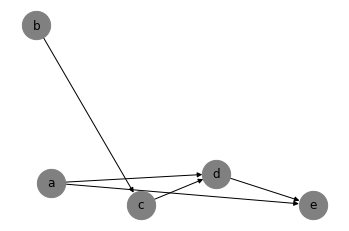

In [4]:
g = SpaceTime()
g.graph.add_edge(2, 1)
g.graph.add_edge(1, 0)
g.graph.add_edge(2, 0)
g.graph.add_edge(3, 1)
g.graph.add_edge(4, 3)
g.topological_sort(node_list)
g.show_adj()
g.draw_graph()

simulating a random 3-degree erdos-renyi dag with range (0.5, 2.0)


{0: {'label': 'a'},
 1: {'label': 'b'},
 2: {'label': 'd'},
 3: {'label': 'c'},
 4: {'label': 'e'}}

{0: {2: {'weight': -0.8968334181569404}},
 1: {3: {'weight': -0.5281847006545327}, 4: {'weight': -1.418143584083632}},
 2: {3: {'weight': -1.5001500731685016}},
 3: {4: {'weight': 1.1555479306990122}},
 4: {}}

array([[ 0.   ,  0.   , -0.897,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , -0.528, -1.418],
       [ 0.   ,  0.   ,  0.   , -1.5  ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  1.156],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ]])

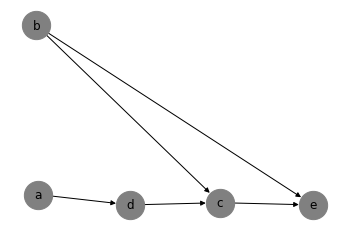

In [14]:
g = SpaceTime.from_spacelike(node_list, simulate=True)
g.graph._node
g.graph._succ
g.show_adj()
g.draw_graph()

{0: {'label': 'a'},
 1: {'label': 'b'},
 2: {'label': 'd'},
 3: {'label': 'c'},
 4: {'label': 'e'}}

{0: {2: {'weight': -0.897}},
 1: {3: {'weight': -0.528}, 4: {'weight': -1.418}},
 2: {3: {'weight': -1.5}},
 3: {4: {'weight': 1.156}},
 4: {}}

array([[ 0.   ,  0.   , -0.897,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , -0.528, -1.418],
       [ 0.   ,  0.   ,  0.   , -1.5  ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  1.156],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ]])

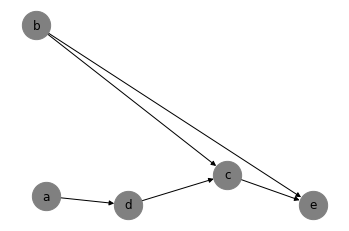

In [15]:
g.topological_sort()
g.graph._node
g.graph._succ
g.show_adj()
g.draw_graph()

In [10]:
g_node_list

[0, 1, 2, 3, 4]

In [16]:
g_adj = g.show_adj()
g_node_list = list(nx.get_node_attributes(g.graph, 'label').values())

In [13]:
g_node_list

[0, 1, 2, 3, 4]

array([[ 0.   ,  0.   , -0.897,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , -0.528, -1.418],
       [ 0.   ,  0.   ,  0.   , -1.5  ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  1.156],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ]])

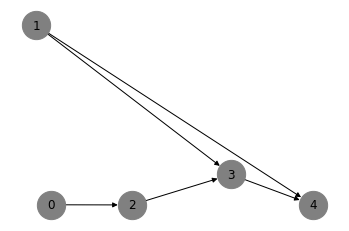

In [18]:


g = SpaceTime.from_adjacency(g_adj)
g.topological_sort()
g.show_adj()
g.draw_graph()

simulating an ordered 3-degree erdos-renyi dag with range (0.5, 2.0)


array([[ 0.   ,  0.   ,  1.688,  1.293,  1.352],
       [ 0.   ,  0.   , -0.631, -0.53 ,  1.749],
       [ 0.   ,  0.   ,  0.   ,  0.   , -1.192],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ]])

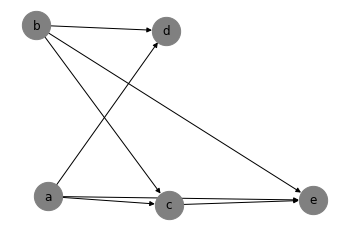

In [8]:
g = SpaceTime.from_spacetime(node_dict, simulate=True)
g.show_adj()
g.draw_graph()

In [9]:
g.generate_data()
g.data[:2]

simulating 10000 samples from a linear-gauss sem with nonlinear_2 causal effects


array([[[ 0.37957621],
        [-0.51080514],
        [ 3.78469677],
        [ 2.93393548],
        [-2.29451184]],

       [[ 0.65192955],
        [-1.18063218],
        [ 1.37140654],
        [ 4.64874046],
        [-3.12282224]]])

In [10]:
nx.ancestors(g.graph, 4)

{0, 1, 2}

## Example 2

{0: ['x0_0', 'x1_0', 'x2_0'],
 1: ['x0_1', 'x1_1', 'x2_1'],
 2: ['x0_2', 'x1_2', 'x2_2'],
 3: ['x0_3', 'x1_3', 'x2_3']}

,x0_0,x1_0,x2_0,x0_1,x1_1,x2_1,x0_2,x1_2,x2_2,x0_3,x1_3,x2_3


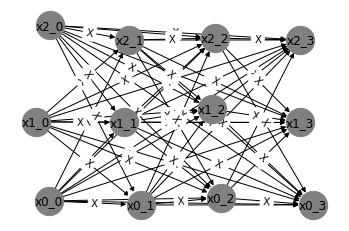

In [11]:
node_dict = dict(zip(range(4), [['x%s_%s'%(i, j) for i in range(3)] for j in range(4)]))
data = pd.DataFrame(columns = [item for sublist in node_dict.values() for item in sublist])

node_dict
data.head()

ic = InductiveCausation(SpaceTime.from_spacetime(node_dict), data, dseparation_test = RobustRegressionTest)
ic.initialize_graph()
ic.st.draw_graph()

## Example 3

In [12]:
node_dict = {0:['x0'],
             1:['x1','x2'],
             2:['x3'],
             3:['x4']}

# generate toy data:
SIZE = 2000
x0 = np.random.normal(size=SIZE)
x1 = x0 + np.random.normal(size=SIZE)
x2 = x0 + np.random.normal(size=SIZE)
x3 = x1 + x2 + np.random.normal(size=SIZE)
x4 = x3 + np.random.normal(size=SIZE)

# load the data into a dataframe:
data = pd.DataFrame(dict(zip([j for i in node_dict.values() for j in i], [x0,x1,x2,x3,x4])))

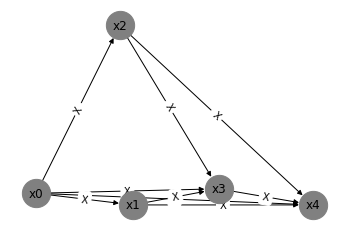

In [13]:
ic = InductiveCausation(SpaceTime.from_spacetime(node_dict), data, dseparation_test = RobustRegressionTest)
ic.initialize_graph()
ic.st.draw_graph()

0 4 (3,) 0.025735863195952974 -0.12794402664229657
1 2 (0,) 0.06376115567726051 -0.03886895117423391
1 4 (3,) 0.07927868820355882 -0.04103937685193994
2 4 (3,) 0.005613494698934296 -0.11747740711364967
0 3 (1, 2) 0.10461537202370291 -0.06367308967303725
0 4 (1, 2) 0.10696795854547606 -0.1416645393802281
1 4 (0, 3) 0.09201990126698426 -0.03174228923850114
2 4 (0, 3) 0.014856954348508172 -0.11265468495589967
0 3 (1, 2, 4) 0.096945701746924 -0.022541381899760224
0 4 (1, 2, 3) 0.04536595597177237 -0.12628656959202866


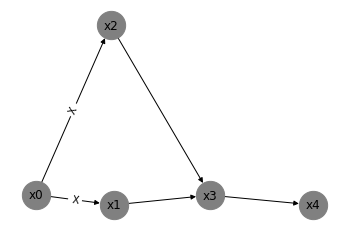

In [14]:
ic.d_separate(alpha=0.05)
ic.infer_latent()
ic.st.draw_graph()

In [15]:
ic.sepset

{(0, 1): set(),
 (0, 2): set(),
 (0, 3): {1, 2},
 (0, 4): {3},
 (1, 2): set(),
 (1, 3): set(),
 (1, 4): {3},
 (2, 3): set(),
 (2, 4): {3},
 (3, 4): set()}

In [16]:
# ic.model_latent()
# ic.st.draw_graph()